# Getting Started with Analyzing FRED data in Python

In [7]:
import pandas_datareader as pdr
import pandas as pd
import datetime as dt
import os
import numpy as np

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots


In [20]:
start = datetime(1980,1,1)
end = dt.datetime.now()

Measuring the Economic Recovery. Inspired by the Daily Podcast on November 19th, 2020 - The Pandemic Economy in 7 Numbers
https://podcasts.apple.com/us/podcast/the-daily/id1200361736?i=1000499396205

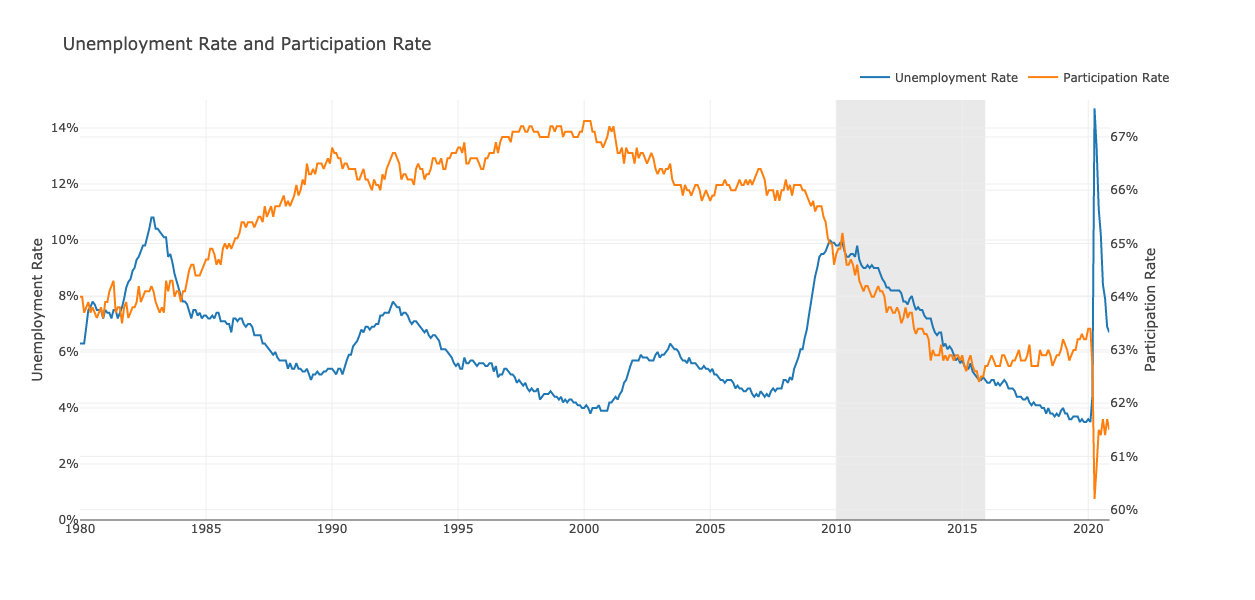

In [126]:
df = pdr.get_data_fred(['UNRATE','CIVPART'], start=start, end=end)

fig1 = make_subplots(specs=[[{"secondary_y": True}]])

fig1.add_trace(go.Scatter(x=df.index, y=df['UNRATE']/100, name='Unemployment Rate'),secondary_y=False)
fig1.add_trace(go.Scatter(x=df.index, y=df['CIVPART']/100, name='Participation Rate'),secondary_y=True)

fig1.update_layout(template='none', 
                   title='Unemployment Rate and Participation Rate', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True, 
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1
                   ))

fig1.update_yaxes(title_text="Unemployment Rate",tickformat=".0%", secondary_y=False, range=[0,.15])
fig1.update_yaxes(title_text="Participation Rate", tickformat=".0%", secondary_y=True)

fig1.add_vrect(
    x0=dt.datetime(2010,1,1), x1=dt.datetime(2015,11,30),
    fillcolor="#D3D3D3", opacity=0.5,
    layer="below", line_width=0,
)
    
fig1.show()

The Unemployment Rate is so interesting 

In [55]:
("{:,}").format(int(df.max() - df.iloc[-1])*1000)

'9,834,000'

In [64]:
df.loc[dt.datetime(2008,1,1)]

PAYEMS    138403
Name: 2008-01-01 00:00:00, dtype: int64

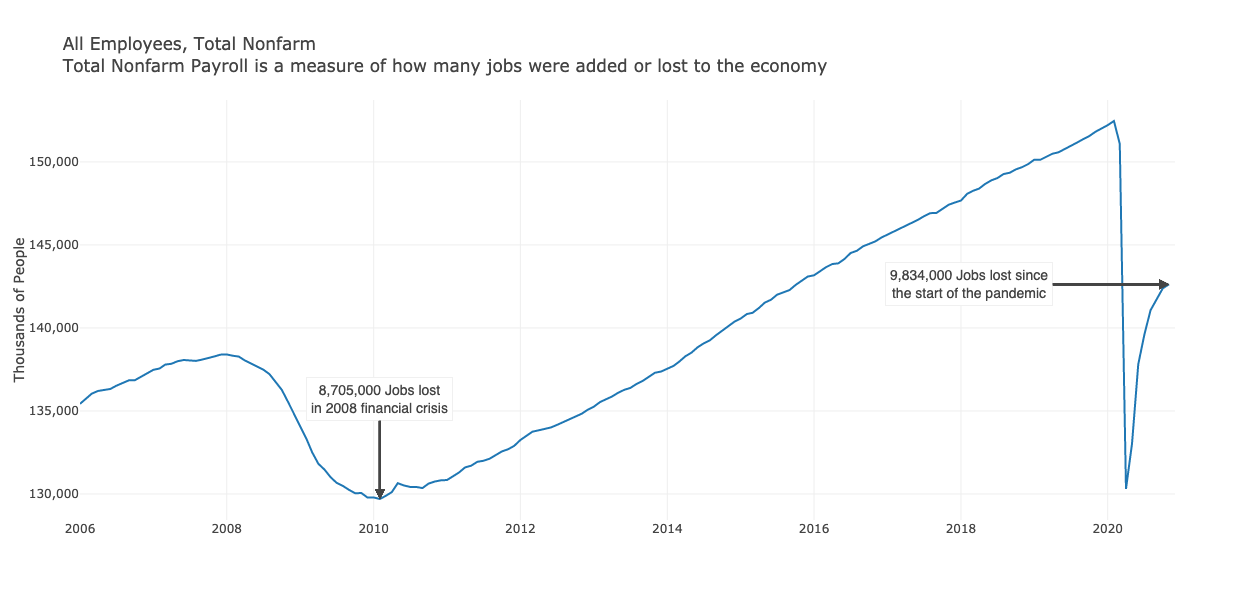

In [125]:
df = pdr.get_data_fred('PAYEMS', start=dt.datetime(2006,1,1), end=end)

fig3 = go.Figure()

fig3.add_trace(go.Scatter(x=df.index, y=df['PAYEMS'], name='All Employees, Total Nonfarm'))

fig3.update_layout(
    template='none', 
    title='All Employees, Total Nonfarm' + '<br>' +'<span style="font-size: 6px;">Total Nonfarm Payroll is a measure of how many jobs were added or lost to the economy</span>', 
    title_x=0.05, 
    height=600, 
    autosize=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

fig3.update_yaxes(title_text="Thousands of People",tickformat=",")

job_loss_2008 = ("{:,}").format(int(df.loc[dt.datetime(2008,1,1)] - int(df.loc[dt.datetime(2010,2,1)]))*1000)

fig2.add_annotation(
        x=dt.datetime(2010,2,1),
        y=int(df.loc[dt.datetime(2010,2,1)]),
        xref="x",
        yref="y",
        text=job_loss_2008+" Jobs lost<br>in 2008 financial crisis",
        showarrow=True,
        font=dict(
            family="Helvetica, monospace",
            size=14,
            color="#444444"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#444444",
        ax=0,
        ay=-100,
        bordercolor="#F0F0F0",
        borderwidth=1,
        borderpad=4,
        bgcolor="#FFFFFF",
        opacity=1
        )

fig2.add_annotation(
        x=df.index[-1], 
        y=int(df.iloc[-1]),
        xref="x",
        yref="y",
        text=("{:,}").format(int(df.max() - df.iloc[-1])*1000) + " Jobs lost since<br>the start of the pandemic</span>",
        showarrow=True,
        font=dict(
            family="Helvetica, monospace",
            size=14,
            color="#444444"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#444444",
        ax=-200,
        ay=0,
        bordercolor="#F0F0F0",
        borderwidth=1,
        borderpad=4,
        bgcolor="#FFFFFF",
        opacity=1
        )
    
fig2.show()

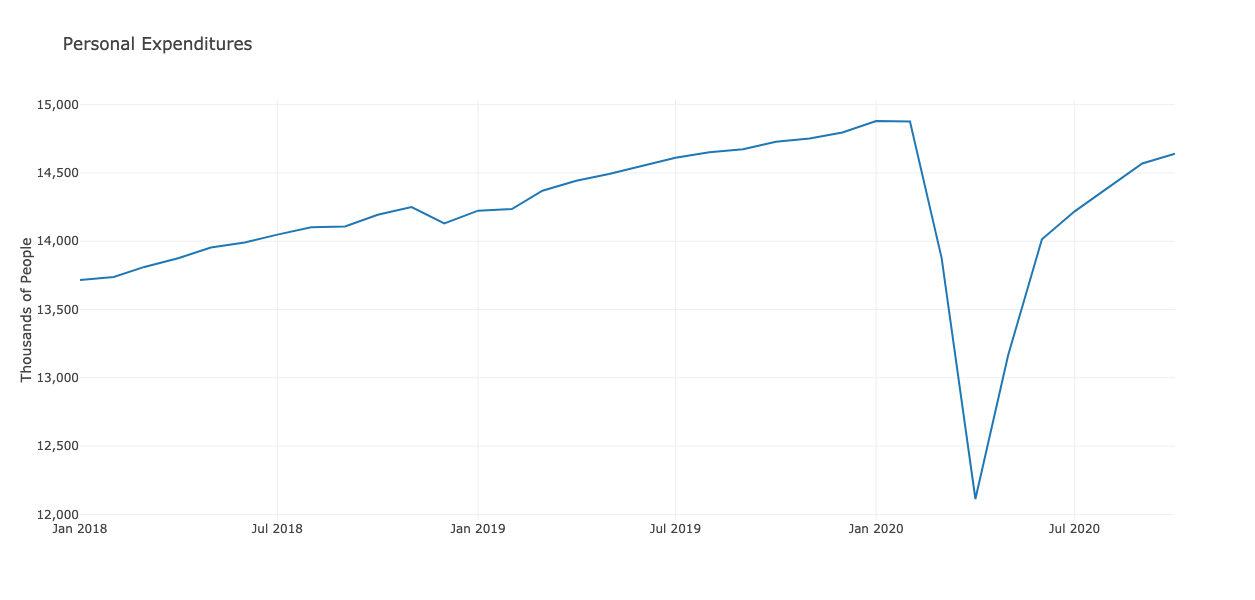

In [101]:
df = pdr.get_data_fred('PAYEMS', start=dt.datetime(2006,1,1), end=end)

fig3 = go.Figure()

fig3.add_trace(go.Scatter(x=df.index, y=df['PAYEMS'], name='All Employees, Total Nonfarm'))

fig3.update_layout(template='none', title='All Employees, Total Nonfarm<br>Total Nonfarm Payroll is a measure of how many jobs were added or lost to the economy', title_x=0.05, height=600, autosize=True,legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig3.update_yaxes(title_text="Thousands of People",tickformat=",")

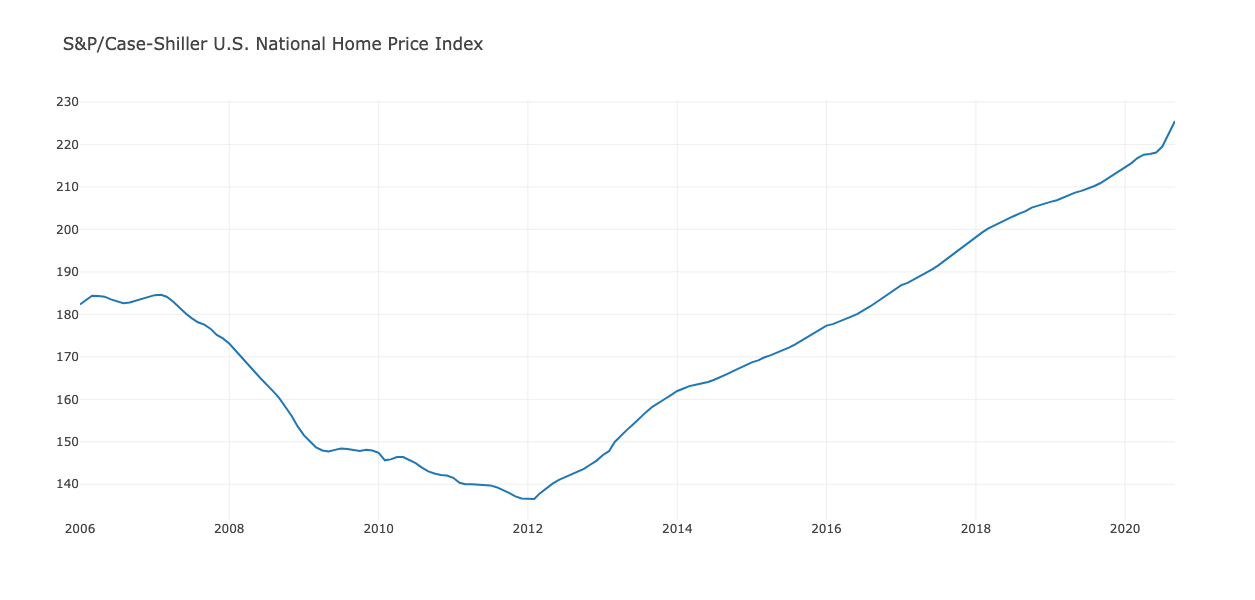

In [115]:
df = pdr.get_data_fred('CSUSHPISA', start=dt.datetime(2006,1,1), end=end)

fig4 = go.Figure()

fig4.add_trace(go.Scatter(x=df.index, y=df['CSUSHPISA'], name='Home Prices'))

fig4.update_layout(template='none', 
                   title='S&P/Case-Shiller U.S. National Home Price Index', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

#fig4.update_yaxes(title_text="Thousands of People",tickformat=",")

# The Bad

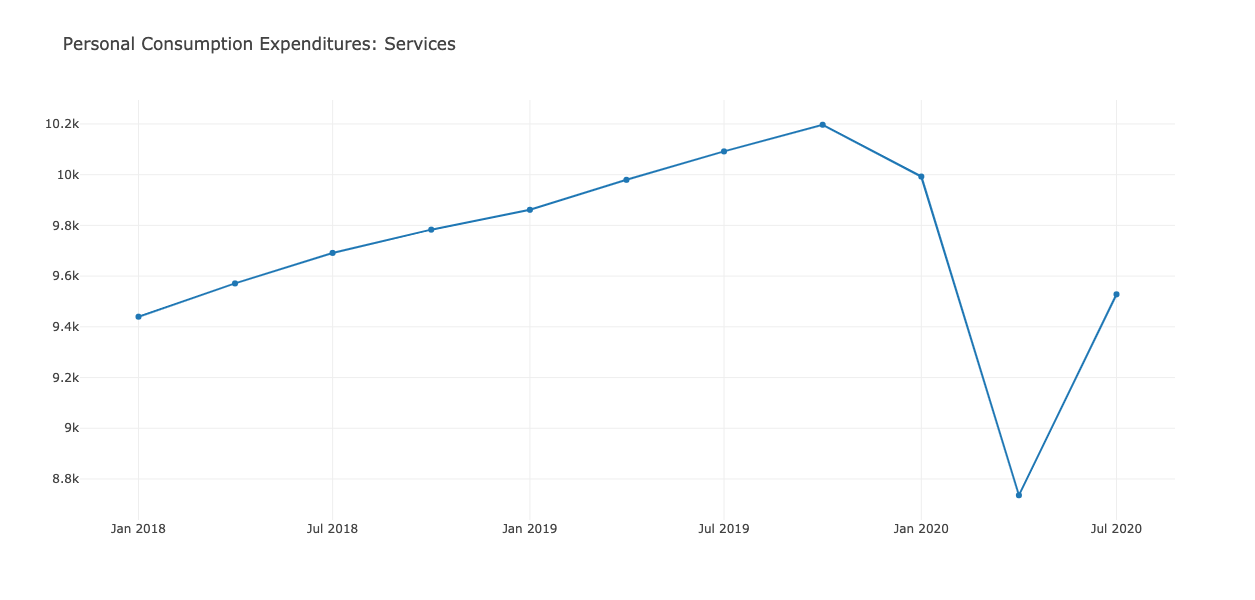

In [116]:
df = pdr.get_data_fred('PCESV', start=dt.datetime(2018,1,1), end=end)

fig4 = go.Figure()

fig4.add_trace(go.Scatter(x=df.index, y=df['PCESV'], name='Home Prices'))

fig4.update_layout(template='none', 
                   title='Personal Consumption Expenditures: Services', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

#fig4.update_yaxes(title_text="Thousands of People",tickformat=",")

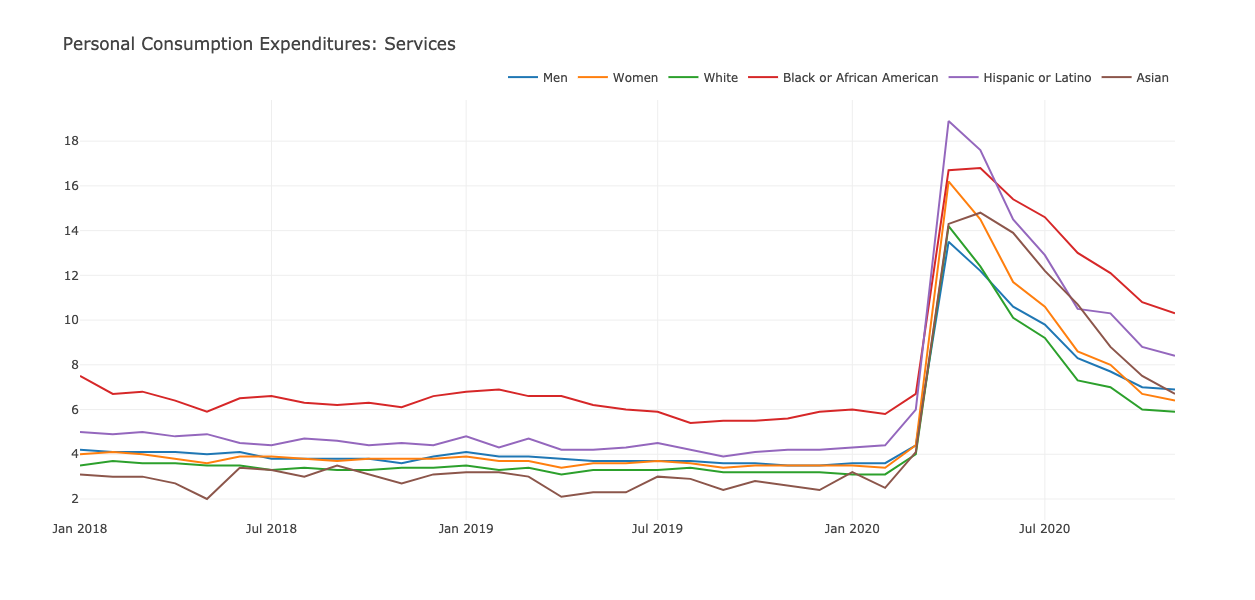

In [121]:
df = pdr.get_data_fred(['LNS14000001','LNS14000002','LNS14000003','LNS14000006','LNS14000009','LNU04032183'], start=dt.datetime(2018,1,1), end=end)

fig5 = go.Figure()

fig5.add_trace(go.Scatter(x=df.index, y=df['LNS14000001'], name='Men'))
fig5.add_trace(go.Scatter(x=df.index, y=df['LNS14000002'], name='Women'))
fig5.add_trace(go.Scatter(x=df.index, y=df['LNS14000003'], name='White'))
fig5.add_trace(go.Scatter(x=df.index, y=df['LNS14000006'], name='Black or African American'))
fig5.add_trace(go.Scatter(x=df.index, y=df['LNS14000009'], name='Hispanic or Latino'))
fig5.add_trace(go.Scatter(x=df.index, y=df['LNU04032183'], name='Asian'))

fig5.update_layout(template='none', 
                   title='Personal Consumption Expenditures: Services', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

#fig4.update_yaxes(title_text="Thousands of People",tickformat=",")

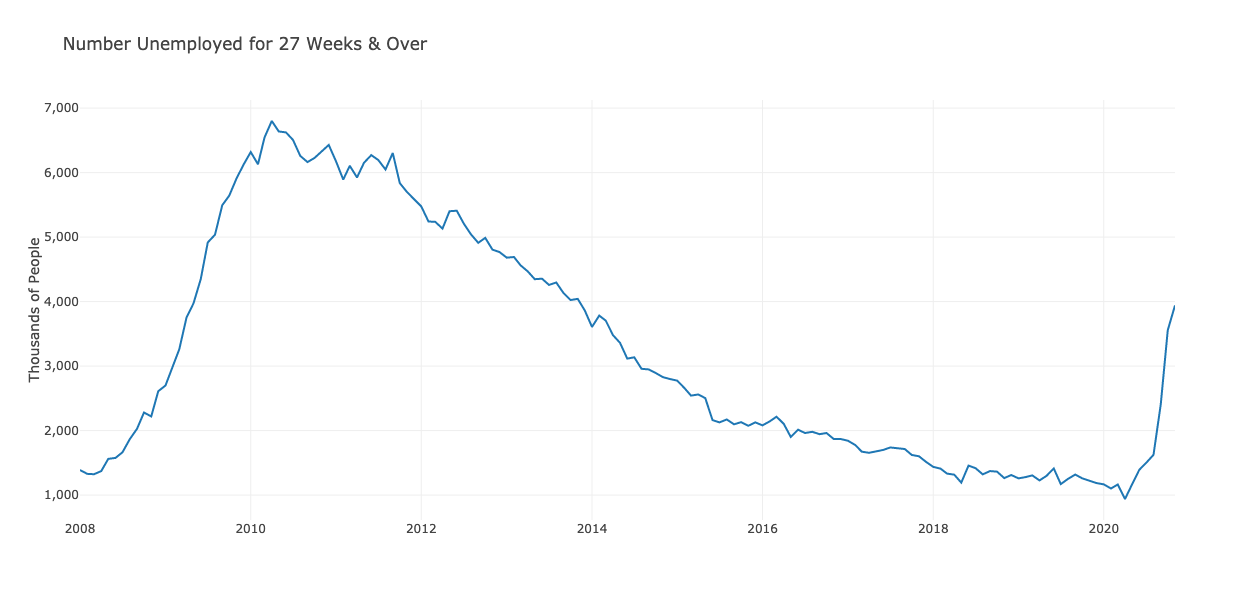

In [124]:
df = pdr.get_data_fred(['UEMP27OV'], start=dt.datetime(2008,1,1), end=end)

fig6 = go.Figure()

fig6.add_trace(go.Scatter(x=df.index, y=df['UEMP27OV'], name='Long Term Unemployed'))

fig6.update_layout(template='none', 
                   title='Number Unemployed for 27 Weeks & Over', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

fig6.update_yaxes(title_text="Thousands of People",tickformat=",")